In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [23]:
# fetching datasets
data_1 = pd.read_csv('/kaggle/input/google-play-store-reviews/google play store reviews.csv')
data_2 = pd.read_csv('/kaggle/input/google-play-store-reviews/google play store reviews most_relevant.csv')
company = pd.read_csv('/kaggle/input/google-play-store-reviews/app search details.csv')

#dropping 'unnamed:0' column from dataset data_1, and data_2
data_1 = data_1.drop('Unnamed: 0',axis = 1)
data_2 = data_2.drop('Unnamed: 0',axis = 1)

# concatenate 'data_1' and 'data_2' in one dataframe
final_data = pd.concat([data_1, data_2],axis= 0)
final_data.shape

# removing duplicates
final_data.duplicated().sum()

# check
print(f'shape of data_1 : {data_1.shape}')
print(f'shape of data_2 : {data_2.shape}')
print(f'shape of final_data : {final_data.shape}')
print(f'shape of duplicates in final data : {final_data.duplicated().sum()}')

shape of data_1 : (46322, 8)
shape of data_2 : (43573, 8)
shape of final_data : (89895, 8)
shape of duplicates in final data : 43216


In [24]:
# dropping all the dupllicates
final_data.drop_duplicates(inplace = True)
final_data.shape

(46679, 8)

In [25]:
company = company[['appId','title','score','developer','installs']]
company.head()

,appId,title,score,developer,installs
0,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,4.247182,IME Digital Solution Limited,"1,000,000+"
1,com.khalti,Khalti Digital Wallet (Nepal),4.163403,Khalti Pvt Ltd,"1,000,000+"
2,com.paynep.moru,Moru - Digital Wallet (Nepal),4.216471,Pay Nep Pvt. Ltd.,"500,000+"
3,com.f1soft.esewa,eSewa - Mobile Wallet (Nepal),3.600684,eSewa Pvt. Ltd.,"5,000,000+"
4,com.paywell.nepal,Paywell Nepal - Mobile Wallet,4.258929,Paywell Nepal Pvt. Ltd.,"100,000+"


In [26]:
# convert the 'installs' column to string
company['installs'] = company['installs'].astype(str)

# remove '+' and ',' from the 'installs' column
company['installs'] = company['installs'].str.replace('+', '').str.replace(',', '')

# convert the 'installs' column to integer
company['installs'] = company['installs'].astype(int)

# sort the dataframe by the 'installs' column in descending order
company_data = company.sort_values('installs', ascending=False)

# print the top 50 rows of the sorted dataframe
company_data.head(40)

,appId,title,score,developer,installs
3,com.f1soft.esewa,eSewa - Mobile Wallet (Nepal),3.600684,eSewa Pvt. Ltd.,5000000
0,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,4.247182,IME Digital Solution Limited,1000000
1,com.khalti,Khalti Digital Wallet (Nepal),4.163403,Khalti Pvt Ltd,1000000
12,com.fonepay,Fonepay App,3.962441,Fonepay Payment Service Limited,500000
2,com.paynep.moru,Moru - Digital Wallet (Nepal),4.216471,Pay Nep Pvt. Ltd.,500000
5,com.prabhutech.prabhupay,PrabhuPAY - Mobile Wallet,3.523438,Prabhu Technology,500000
17,com.infodev.nchl_android,"connectIPS (NCHL, Nepal)",3.530351,Nepal Clearing House Ltd,500000
13,com.mobile.smartcard,MyPay,3.758893,Smart Card Nepal Pvt Ltd,500000
18,com.dpaisa,Dpaisa,3.728155,Silk Innovation Pvt. Ltd.,100000
16,com.cellpay,CellPay,3.360000,Cellcom Private Limited,100000


# EDA on Company Analysis

                             title     score
4    Paywell Nepal - Mobile Wallet  4.258929
0   IME Pay- Mobile Digital Wallet  4.247182
2    Moru - Digital Wallet (Nepal)  4.216471
1    Khalti Digital Wallet (Nepal)  4.163403
15                   IME Pay Agent  4.000000
12                     Fonepay App  3.962441
7                       QPay Nepal  3.765217
13                           MyPay  3.758893
18                          Dpaisa  3.728155
8                      Namaste Pay  3.707865
3    eSewa - Mobile Wallet (Nepal)  3.600684
17        connectIPS (NCHL, Nepal)  3.530351
5        PrabhuPAY - Mobile Wallet  3.523438
10  UnelmaPay : Mobile Digital Wal  3.517857
16                         CellPay  3.360000


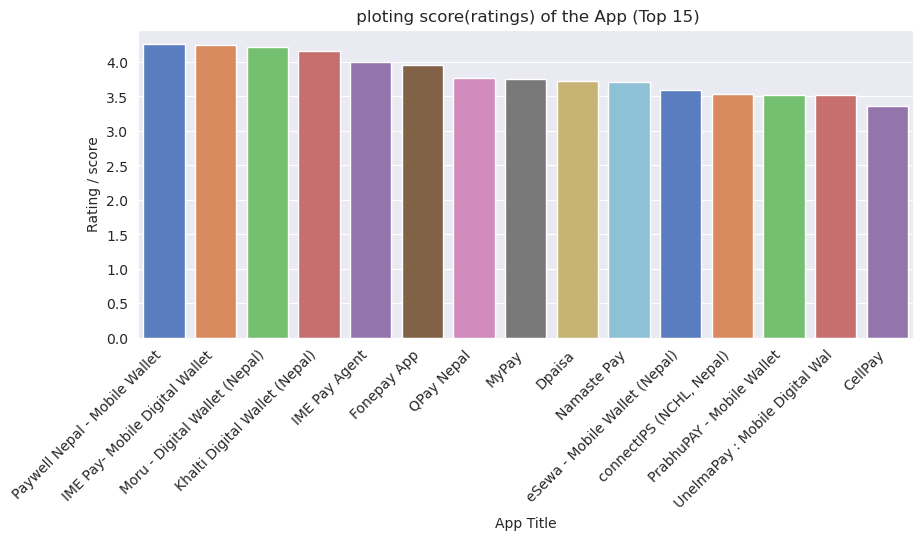

In [27]:
# ploting score(ratings) of the App

score_plot = company_data[['title','score']].sort_values(by='score', ascending=False)

# Select the top 15 apps by score
top_15 = score_plot.nlargest(15, 'score')
print(top_15)

# Plot the data using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=top_15['title'], y=top_15['score'], data=top_15, palette="muted")
plt.title(" ploting score(ratings) of the App (Top 15)")
plt.xlabel("App Title")
plt.ylabel("Rating / score")
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for readability

plt.show()

                             title  installs
3    eSewa - Mobile Wallet (Nepal)   5000000
1    Khalti Digital Wallet (Nepal)   1000000
0   IME Pay- Mobile Digital Wallet   1000000
12                     Fonepay App    500000
2    Moru - Digital Wallet (Nepal)    500000
5        PrabhuPAY - Mobile Wallet    500000
17        connectIPS (NCHL, Nepal)    500000
13                           MyPay    500000
11            Thaili Digital Paisa    100000
4    Paywell Nepal - Mobile Wallet    100000
7                       QPay Nepal    100000
8                      Namaste Pay    100000
15                   IME Pay Agent    100000
19                   Mobile Wallet    100000
16                         CellPay    100000


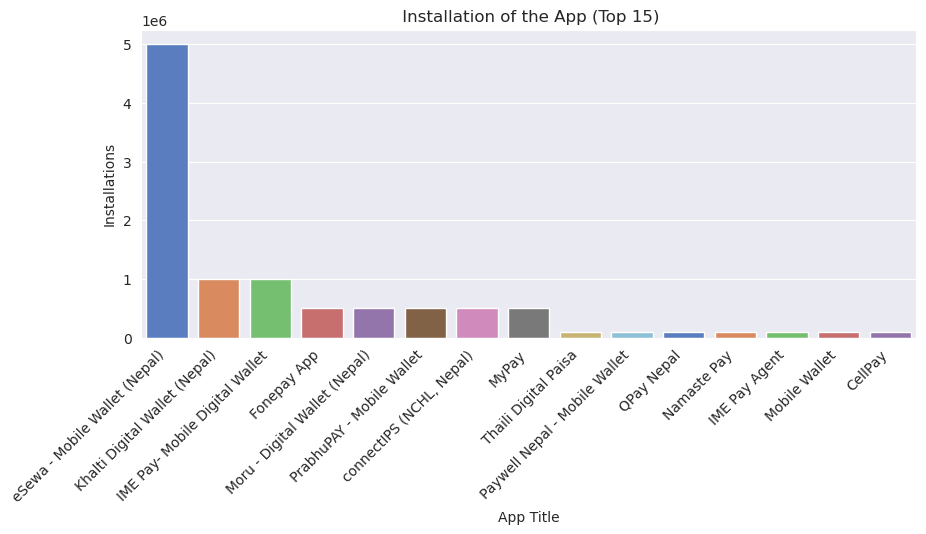

In [28]:
# Installation of the App
installation_plot = company_data[['title','installs']].sort_values(by='installs', ascending=False)

# Select the top 15 apps by installs
top_15 = installation_plot.nlargest(15, 'installs')
print(top_15)

# Plot the data using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=top_15['title'], y=top_15['installs'], data=top_15, palette="muted")
plt.title(" Installation of the App (Top 15)")
plt.xlabel("App Title")
plt.ylabel("Installations")
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for readability

plt.show()


# EDA on Reviews Dataset

In [29]:
final_data.head(20)

,userName,content,score,reviewCreatedVersion,at,app_id,app_title,comapny
0,Sunita Gurung,Good,5,3.2.0,2023-03-22 09:02:27,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
1,Ray Gun,We have to fill up the KYC form for the transa...,2,3.2.0,2023-03-22 08:44:35,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
2,Sajan Kushwaha,Superb useful app,5,3.2.0,2023-03-21 14:57:42,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
3,Nitish Gupta,This app is worst the time and when I download...,3,NaN,2023-03-20 10:54:00,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
4,Karuna Sunuwar,i cannot create my virtual card. There is opti...,1,NaN,2023-03-20 08:07:38,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
5,Ashok Yadav,Supoo,5,3.2.0,2023-03-20 06:07:30,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
6,Sujan Gachhadar,Verry good,5,3.2.0,2023-03-20 02:43:20,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
7,Ambu Lama,Love 😘,5,NaN,2023-03-20 01:51:16,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
8,ashish prasad gorkhali,Good morning my pleasure,5,3.2.0,2023-03-19 23:42:16,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited
9,Sanjaya Magar,यो एपमा अन्य मोबाइल बैँकिङ प्रणाली संग लिङ्क ग...,5,3.2.0,2023-03-19 15:53:14,com.swifttechnology.imepay,IME Pay- Mobile Digital Wallet,IME Digital Solution Limited


In [30]:
# Renaming the column 'at' as Date
final_data = final_data.rename(columns = {'at':'Date','reviewCreatedVersion':'Version'})

#Rearranging the columns
final_data = final_data[['Date','app_title','Version','userName','content','score']]
final_data.head(3)

,Date,app_title,Version,userName,content,score
0,2023-03-22 09:02:27,IME Pay- Mobile Digital Wallet,3.2.0,Sunita Gurung,Good,5
1,2023-03-22 08:44:35,IME Pay- Mobile Digital Wallet,3.2.0,Ray Gun,We have to fill up the KYC form for the transa...,2
2,2023-03-21 14:57:42,IME Pay- Mobile Digital Wallet,3.2.0,Sajan Kushwaha,Superb useful app,5


In [31]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46679 entries, 0 to 36179
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       46679 non-null  object
 1   app_title  46679 non-null  object
 2   Version    33255 non-null  object
 3   userName   46679 non-null  object
 4   content    46661 non-null  object
 5   score      46679 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [32]:
# converting date type from object to date
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Extracting year and mpnth from date
final_data['Year'] = final_data['Date'].dt.year
final_data['Month'] = final_data['Date'].dt.month

#Rearranging the columns
final_data = final_data[['Date','Year','Month','app_title','Version','userName','content','score']]

final_data.head(3)



,Date,Year,Month,app_title,Version,userName,content,score
0,2023-03-22 09:02:27,2023,3,IME Pay- Mobile Digital Wallet,3.2.0,Sunita Gurung,Good,5
1,2023-03-22 08:44:35,2023,3,IME Pay- Mobile Digital Wallet,3.2.0,Ray Gun,We have to fill up the KYC form for the transa...,2
2,2023-03-21 14:57:42,2023,3,IME Pay- Mobile Digital Wallet,3.2.0,Sajan Kushwaha,Superb useful app,5


In [33]:
final_data.isnull().sum()

Date             0
Year             0
Month            0
app_title        0
Version      13424
userName         0
content         18
score            0
dtype: int64

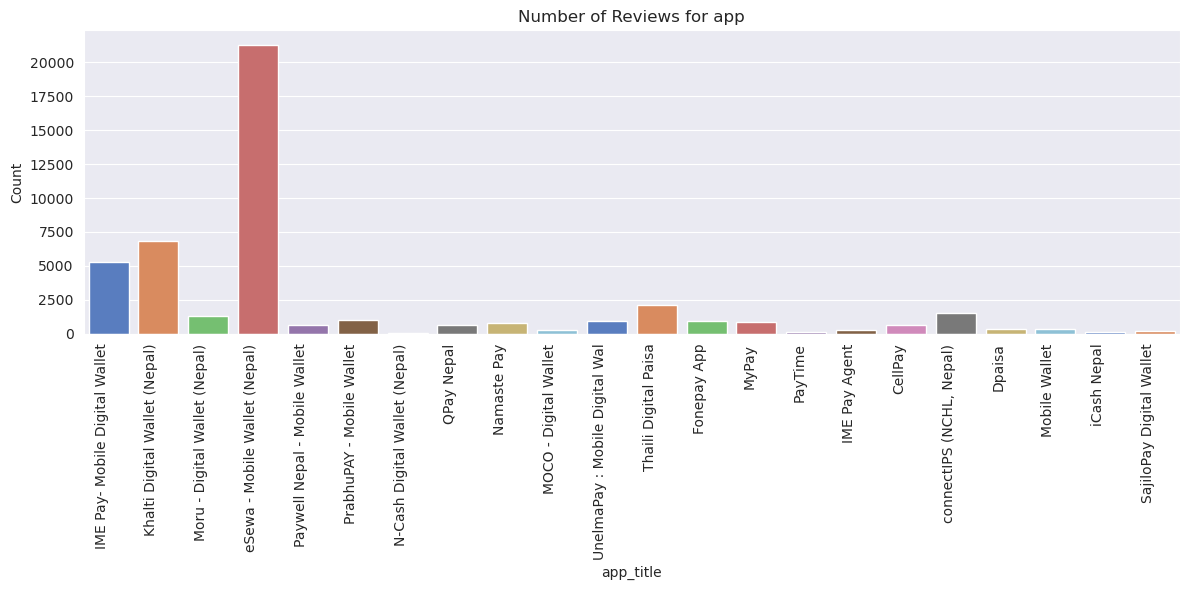

In [34]:
# countplot for the app_title

fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x="app_title", data=final_data, ax = ax,palette="muted")
ax.set_title("Number of Reviews for app")
ax.set_xlabel("app_title")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

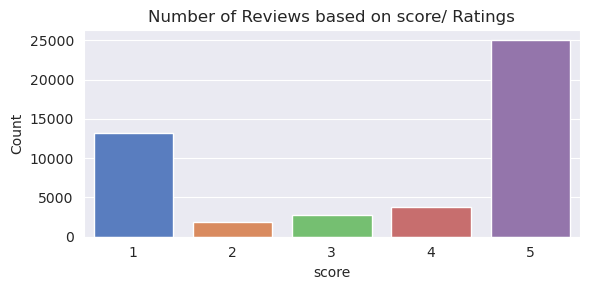

In [35]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.countplot(x="score", data=final_data, ax = ax,palette="muted")
ax.set_title("Number of Reviews based on score/ Ratings")
ax.set_xlabel("score")
ax.set_ylabel("Count")
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

In [36]:
print(f'starting date : {final_data["Date"].min()}')
print(f'Current date : {final_data["Date"].max()}')

starting date : 2013-01-01 08:55:32
Current date : 2023-03-22 11:18:41


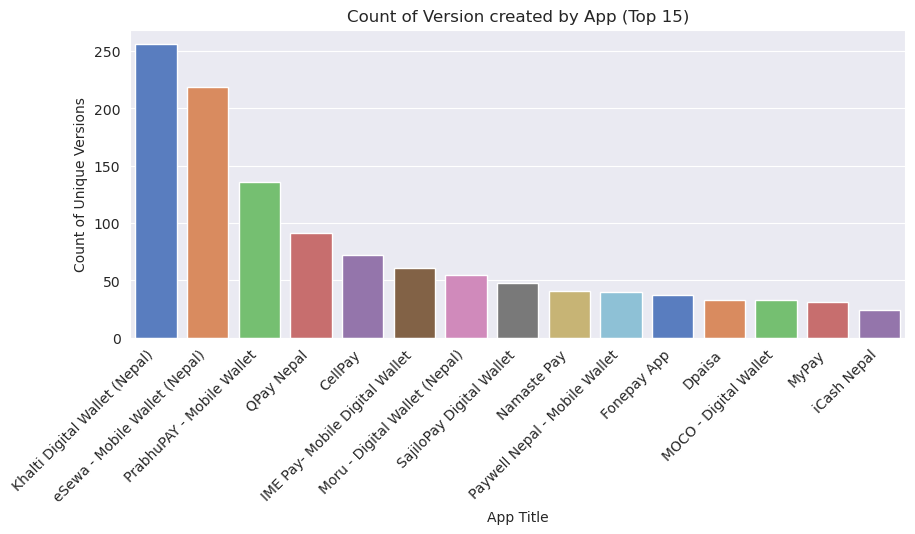

In [37]:
# Count of Version created by App.
grouped = final_data.groupby('app_title').agg({'Version':'nunique'}).sort_values(by='Version', ascending=False)

# Select the top 15 apps by count of unique versions
top_15 = grouped.nlargest(15, 'Version')

# Plot the data using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=top_15.index, y="Version", data=top_15, palette="muted")
plt.title("Count of Version created by App (Top 15)")
plt.xlabel("App Title")
plt.ylabel("Count of Unique Versions")
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for readability

plt.show()


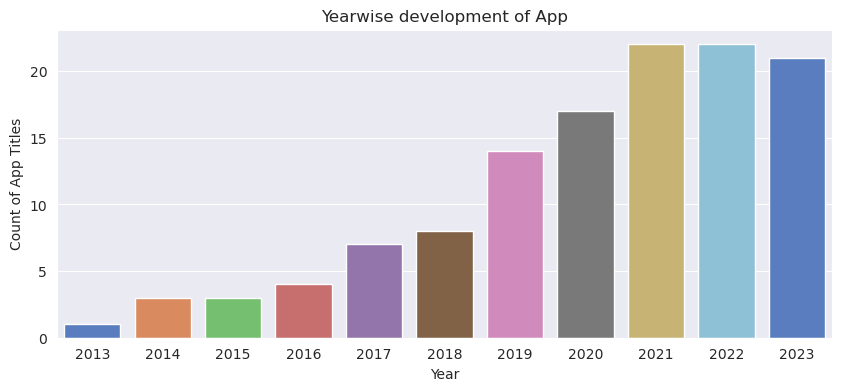

In [38]:
# Yearwise development of App
year_wise = final_data.groupby('Year').agg({'app_title':'nunique'})

# Plot the data using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=year_wise.index, y="app_title", data=year_wise, palette="muted")
plt.title("Yearwise development of App")
plt.xlabel("Year")
plt.ylabel("Count of App Titles")

plt.show()

# Sentiment Analysis

shape of dataset( reviews_df) : (46661, 8)
overall_sentiment_of_app_in_Nepal : 0.23507304386961278
                                sentiment_score
app_title                                      
UnelmaPay : Mobile Digital Wal         0.361611
IME Pay- Mobile Digital Wallet         0.312774
Thaili Digital Paisa                   0.292800
Moru - Digital Wallet (Nepal)          0.291656
Khalti Digital Wallet (Nepal)          0.275192
SajiloPay Digital Wallet               0.242976
Mobile Wallet                          0.240208
IME Pay Agent                          0.227997
eSewa - Mobile Wallet (Nepal)          0.227794
MyPay                                  0.225745


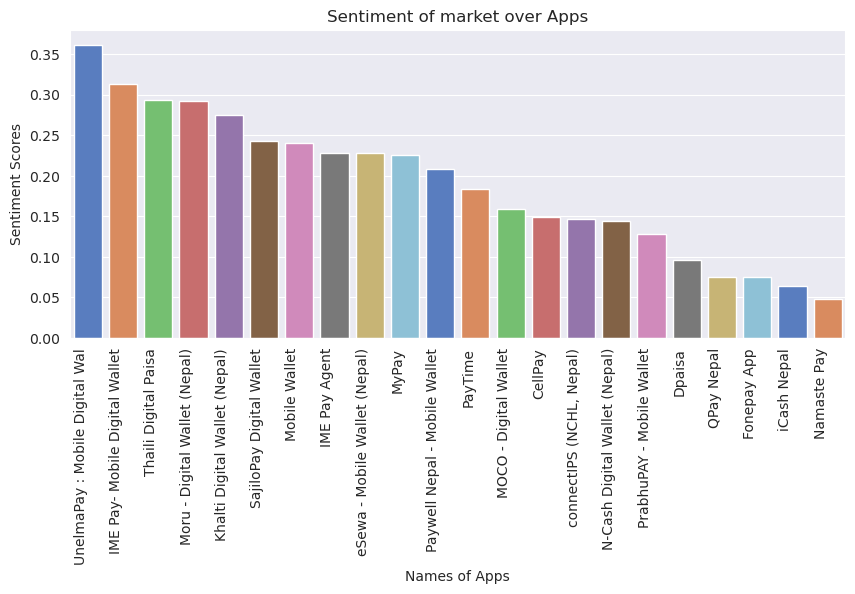

In [39]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the reviews from a CSV file
reviews_df = final_data

# Filter out missing values
reviews_df = reviews_df.dropna(subset=['content'])
print(f'shape of dataset( reviews_df) : {reviews_df.shape}')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment score for each review
def compute_sentiment_score(text):
    # Compute the sentiment score using VADER
    score = analyzer.polarity_scores(text)

    # Return the compound score, which ranges from -1 to 1
    return score['compound']

# Compute the sentiment score for each review
reviews_df['sentiment_score'] = reviews_df['content'].apply(compute_sentiment_score)

# Compute the mean sentiment polarity of all reviews
# This will reflect the overall sentiment polarity of digital wallet app in Nepal
overall_sentiment_of_app_in_Nepal = reviews_df['sentiment_score'].mean()
print(f'overall_sentiment_of_app_in_Nepal : {overall_sentiment_of_app_in_Nepal}')

# Sentiment of each app in the market
sentiment = reviews_df.groupby('app_title').agg({'sentiment_score':'mean'}).sort_values(by='sentiment_score', ascending=False)
print(sentiment.head(10))

# Plot the data using Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=sentiment.index, y="sentiment_score", data=sentiment, palette="muted")
plt.title("Sentiment of market over Apps")
plt.xlabel("Names of Apps")
plt.ylabel("Sentiment Scores")

plt.xticks(rotation=90, ha='right')

plt.show()


# Predicting ratings based on reviews

In [40]:
# Extracting columns ['content','score'] for predicting ratings
pred_ratings = final_data[['content','score']]
pred_ratings.isnull().sum()


content    18
score       0
dtype: int64

In [41]:
# Print the original shape of the DataFrame
print(f'shape of dataset (pred_ratings) before removing null : {pred_ratings.shape}')

# Drop missing values
pred_ratings.dropna(inplace=True)

# Print the new shape of the DataFrame
print(f'shape of dataset (pred_ratings) after removing null : {pred_ratings.shape}')


shape of dataset (pred_ratings) before removing null : (46679, 2)
shape of dataset (pred_ratings) after removing null : (46661, 2)


# Text Processing

In [42]:
# Word Processing : - Removing stopwords, Puntuation, Lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Word Embedding 
from gensim.models import Word2Vec

# Train and Test split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import accuracy_score, classification_report

from tqdm import tqdm

In [45]:
#  Load the dataset
data = pred_ratings

# # Preprocess the review text data
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()
# def preprocess_text(text):
#     # Remove punctuation and convert to lowercase
#     text = text.translate(str.maketrans('', '', string.punctuation)).lower()
#     # Tokenize the text
#     tokens = nltk.word_tokenize(text)
#     # Remove stop words and lemmatize the remaining words
#     tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
#     # Join the tokens back into a string
#     return ' '.join(tokens)

# data['content'] = data['content'].apply(preprocess_text)

In [46]:
# Train a Word2Vec model on the preprocessed review text data
sentences = [review.split() for review in data['content']]
model = Word2Vec(sentences, vector_size=300, min_count=1)

# Generate Word2Vec embeddings for the preprocessed review text data using the average Word2Vec technique
def get_embedding(review):
    words = review.split()
    embeddings = [model.wv.get_vector(word) for word in words if word in model.wv.key_to_index]
    if len(embeddings) == 0:
        return np.zeros(300)
    else:
        return np.mean(embeddings, axis=0)

X = np.array([get_embedding(review) for review in data['content']])
y = data['score']

In [47]:
from imblearn.over_sampling import SMOTE

# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto',k_neighbors=5,n_jobs=-1,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [48]:
print(f'y_resampled.shape : {y_resampled.shape}')
print(y_resampled.value_counts())
print('*'*20)
print(f'y.shape :{y.shape}')
print(y.value_counts())


y_resampled.shape : (125010,)
5    25002
2    25002
3    25002
1    25002
4    25002
Name: score, dtype: int64
********************
y.shape :(46661,)
5    25002
1    13213
4     3743
3     2798
2     1905
Name: score, dtype: int64


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=42)

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Modelling

In [50]:
# Train and evaluate different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000,n_jobs=-1),
    'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
#     'SVM Classifier': SVC(),
    'Naive Bayes Classifier': MultinomialNB()
}


In [51]:
# create a dictionary to store results
results = {}

# loop through all classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    # add the accuracy score to the dictionary
    report = classification_report(y_test, y_pred)
    print(f"Training {clf_name}...")
    print(report)
    results[clf_name] = accuracy

# convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# sort the DataFrame by accuracy in descending order
results_df = results_df.sort_values('Accuracy', ascending=False)

# print the results
print(results_df)

Training Logistic Regression...
              precision    recall  f1-score   support

           1       0.49      0.49      0.49      5072
           2       0.36      0.42      0.39      5034
           3       0.32      0.22      0.26      4919
           4       0.34      0.19      0.25      4943
           5       0.45      0.72      0.56      5034

    accuracy                           0.41     25002
   macro avg       0.39      0.41      0.39     25002
weighted avg       0.39      0.41      0.39     25002

Training Random Forest Classifier...
              precision    recall  f1-score   support

           1       0.85      0.86      0.86      5072
           2       0.96      0.93      0.95      5034
           3       0.91      0.87      0.89      4919
           4       0.90      0.77      0.83      4943
           5       0.66      0.79      0.72      5034

    accuracy                           0.84     25002
   macro avg       0.85      0.84      0.85     25002
weighted

# Checking

In [52]:
review = '''
improvement required for user-friendly. How many napalese citizen live aboard or travels ? A huge number right. The app should have an option to open / create an account in foreigner number whichever state person live at the end person need to use khalti service right from the airport paying such as taxi's fare and others. Please improve your services, as national citizen I tried to create an account while in living aboard but it asked mobile number instead email Please fix it.'''



In [53]:
# Preprocess the review text
review_words = review.split()

# Generate Word2Vec embeddings for the review text
review_embeddings = [model.wv.get_vector(word) for word in review_words if word in model.wv.key_to_index]
if len(review_embeddings) == 0:
    review_embedding = np.zeros(300)
else:
    review_embedding = np.mean(review_embeddings, axis=0)

# Scale the review embedding using the fitted MinMaxScaler object
review_embedding_scaled = scaler.transform(review_embedding.reshape(1, -1))

# Use the trained classifiers to predict the rating
for clf_name, clf in classifiers.items():
    rating_pred = clf.predict(review_embedding_scaled)
    print(f"Predicted rating using {clf_name}: {rating_pred[0]}")

Predicted rating using Logistic Regression: 2
Predicted rating using Random Forest Classifier: 2
Predicted rating using Naive Bayes Classifier: 2


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
